## Collating the data into one data file

In [1]:
import numpy as np
import scipy.interpolate

from data_collator import generate_final_data
generate_final_data()

Level 60:root:Processing file: cleaned_data.csv
Level 60:root:Processing file: data.csv
Level 60:root:Processing file: final.csv
Level 60:root:Processing file: final_data.csv
Level 60:root:Processing file: January 08 2024.csv
Level 60:root:Processing file: January 09 2024.csv
Level 60:root:Processing file: January 10 2024.csv
Level 60:root:Processing file: January 11 2024.csv
Level 60:root:Processing file: January 12 2024.csv
Level 60:root:Processing file: January 13 2024.csv
Level 60:root:Processing file: January 14 2024.csv
Level 60:root:Processing file: January 15 2024.csv
Level 60:root:Processing file: January 16 2024.csv
Level 60:root:Processing file: January 17 2024.csv
Level 60:root:Processing file: January 18 2024.csv
Level 60:root:Processing file: January 20 2024.csv
Level 60:root:Processing file: January 08 2024.csv
Level 60:root:Processing file: January 09 2024.csv
Level 60:root:Processing file: January 10 2024.csv
Level 60:root:Processing file: January 11 2024.csv
Level 60:

In [2]:
import pandas as pd
from utils import *

In [3]:
data = pd.read_csv('data/data.csv')

In [4]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price
0,CA135087H235,CAD,2.00,3.33%,Aaa,06/01/2028,94.55,94.77,08/01/2017,94.55
1,CA135087N266,CAD,1.50,3.27%,Aaa,12/01/2031,87.68,87.82,10/25/2021,87.68
2,CA135087L443,CAD,0.50,3.28%,Aaa,12/01/2030,83.08,83.17,10/05/2020,83.08
3,CA135087M847,CAD,1.25,3.61%,Aaa,03/01/2027,93.13,93.15,10/15/2021,93.13
4,CA135087M276,CAD,1.50,3.28%,Aaa,06/01/2031,88.36,88.50,4/26/2021,88.36
...,...,...,...,...,...,...,...,...,...,...
487,CA135087P402,CAD,3.00,4.88%,Aaa,11/1/2024,98.58,98.59,8/15/2022,98.58
488,CA135087J967,CAD,1.50,4.86%,Aaa,9/1/2024,98.00,98.01,4/5/2019,98.00
489,CA135087P246,CAD,3.00,4.26%,Aaa,10/1/2025,97.82,97.94,7/25/2022,97.82
490,CA135087L690,CAD,0.25,4.69%,Aaa,4/1/2024,99.15,99.16,10/16/2020,99.15


In [5]:
data = data.loc[data.groupby('ISIN')['Ask'].idxmax()]

In [6]:
data.reset_index(inplace=True)

In [7]:
data.drop('index', axis=1, inplace=True)

In [8]:
data.head()

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price
0,CA135087B451,CAD,2.50,5.04%,Aaa,6/1/2024,99.10,99.11,7/2/2013,99.10
1,CA135087D507,CAD,2.25,4.21%,Aaa,6/1/2025,97.36,97.49,6/30/2014,97.36
2,CA135087E679,CAD,1.50,3.70%,Aaa,6/1/2026,95.13,95.26,7/21/2015,95.13
3,CA135087F825,CAD,1.00,3.42%,Aaa,6/1/2027,92.35,92.68,8/3/2016,92.35
4,CA135087H235,CAD,2.00,3.26%,Aaa,6/1/2028,94.93,95.06,8/1/2017,94.93


In [9]:
data.to_csv('data/cleaned_data.csv', index=False)

In [10]:
data = pd.read_csv('data/cleaned_data.csv')

In [11]:
data.head()

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price
0,CA135087B451,CAD,2.50,5.04%,Aaa,6/1/2024,99.10,99.11,7/2/2013,99.10
1,CA135087D507,CAD,2.25,4.21%,Aaa,6/1/2025,97.36,97.49,6/30/2014,97.36
2,CA135087E679,CAD,1.50,3.70%,Aaa,6/1/2026,95.13,95.26,7/21/2015,95.13
3,CA135087F825,CAD,1.00,3.42%,Aaa,6/1/2027,92.35,92.68,8/3/2016,92.35
4,CA135087H235,CAD,2.00,3.26%,Aaa,6/1/2028,94.93,95.06,8/1/2017,94.93


In [12]:
data['Maturity Date'] = pd.to_datetime(data['Maturity Date'], format='%m/%d/%Y')
data['Issue Date'] = pd.to_datetime(data['Issue Date'], format='%m/%d/%Y')

In [13]:
data = get_bonds(data)

D:\Assignment\MAT1856\Assignment\Assignment 1\utils.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Par Value"] = 1000
D:\Assignment\MAT1856\Assignment\Assignment 1\utils.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Coupon Payment"] = df["Par Value"] * df["Coupon"] / 200
D:\Assignment\MAT1856\Assignment\Assignment 1\utils.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [14]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,Par Value,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity
0,CA135087B451,CAD,2.500,5.04%,Aaa,2024-06-01,99.10,99.11,2013-07-02,99.10,1000,12.500,101.250685,23.0,0.161587,117,3.900000
1,CA135087D507,CAD,2.250,4.21%,Aaa,2025-06-01,97.36,97.49,2014-06-30,97.36,1000,11.250,99.295616,23.0,0.155569,482,16.066667
2,CA135087E679,CAD,1.500,3.70%,Aaa,2026-06-01,95.13,95.26,2015-07-21,95.13,1000,7.500,96.420411,23.0,0.138394,847,28.233333
3,CA135087F825,CAD,1.000,3.42%,Aaa,2027-06-01,92.35,92.68,2016-08-03,92.35,1000,5.000,93.210274,22.0,0.131443,1212,40.400000
4,CA135087H235,CAD,2.000,3.26%,Aaa,2028-06-01,94.93,95.06,2017-08-01,94.93,1000,10.000,96.650548,22.0,0.154175,1578,52.600000
6,CA135087J546,CAD,2.250,4.88%,Aaa,2024-03-01,99.64,99.70,2018-10-05,99.64,1000,11.250,101.575616,11.0,0.272041,25,0.833333
7,CA135087J967,CAD,1.500,4.77%,Aaa,2024-09-01,97.98,98.06,2019-04-05,97.98,1000,7.500,99.270411,11.0,0.254576,209,6.966667
8,CA135087K528,CAD,1.250,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,1000,6.250,97.745342,11.0,0.248408,390,13.000000
9,CA135087K940,CAD,0.500,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,1000,2.500,94.920137,11.0,0.230807,574,19.133333
11,CA135087L518,CAD,0.250,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,1000,1.250,93.235068,11.0,0.224626,755,25.166667


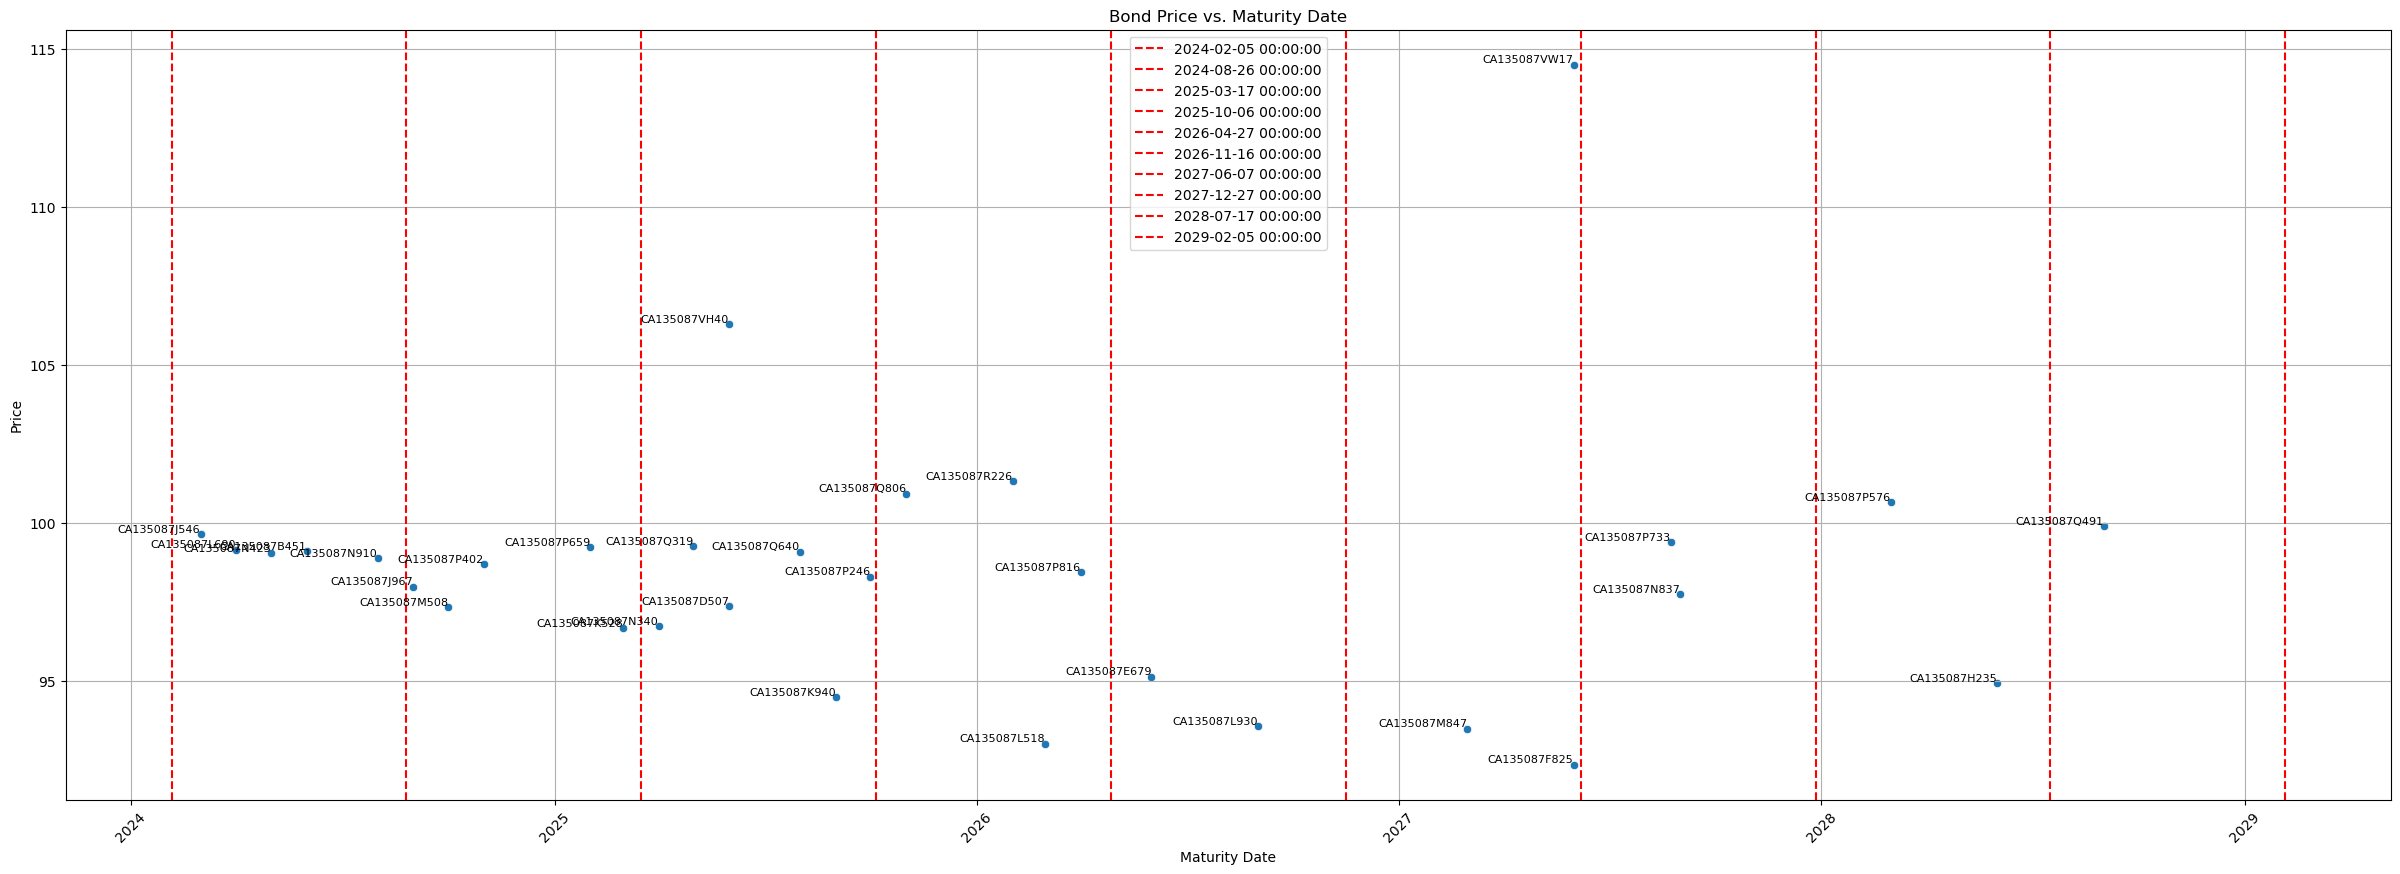

In [15]:
plot_bonds_price(data)

In [16]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,Par Value,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity
0,CA135087B451,CAD,2.500,5.04%,Aaa,2024-06-01,99.10,99.11,2013-07-02,99.10,1000,12.500,101.250685,23.0,0.161587,117,3.900000
1,CA135087D507,CAD,2.250,4.21%,Aaa,2025-06-01,97.36,97.49,2014-06-30,97.36,1000,11.250,99.295616,23.0,0.155569,482,16.066667
2,CA135087E679,CAD,1.500,3.70%,Aaa,2026-06-01,95.13,95.26,2015-07-21,95.13,1000,7.500,96.420411,23.0,0.138394,847,28.233333
3,CA135087F825,CAD,1.000,3.42%,Aaa,2027-06-01,92.35,92.68,2016-08-03,92.35,1000,5.000,93.210274,22.0,0.131443,1212,40.400000
4,CA135087H235,CAD,2.000,3.26%,Aaa,2028-06-01,94.93,95.06,2017-08-01,94.93,1000,10.000,96.650548,22.0,0.154175,1578,52.600000
6,CA135087J546,CAD,2.250,4.88%,Aaa,2024-03-01,99.64,99.70,2018-10-05,99.64,1000,11.250,101.575616,11.0,0.272041,25,0.833333
7,CA135087J967,CAD,1.500,4.77%,Aaa,2024-09-01,97.98,98.06,2019-04-05,97.98,1000,7.500,99.270411,11.0,0.254576,209,6.966667
8,CA135087K528,CAD,1.250,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,1000,6.250,97.745342,11.0,0.248408,390,13.000000
9,CA135087K940,CAD,0.500,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,1000,2.500,94.920137,11.0,0.230807,574,19.133333
11,CA135087L518,CAD,0.250,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,1000,1.250,93.235068,11.0,0.224626,755,25.166667


In [17]:
data["Maturing Month"] = data[("Maturity Date")].dt.month

In [18]:
data = zero_coupon_bonds(data)

D:\Assignment\MAT1856\Assignment\Assignment 1\utils.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_df["Zero_Yield"] = np.log((zero_df["Par Value"] + zero_df["Coupon Payment"]) / zero_df["Dirty Price"]) / \


In [19]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,Par Value,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity,Maturing Month,Zero_Yield
0,CA135087D507,CAD,2.250,4.21%,Aaa,2025-06-01,97.36,97.49,2014-06-30,97.36,1000,11.250,99.295616,23.0,0.155569,482,16.066667,6,NaN
1,CA135087E679,CAD,1.500,3.70%,Aaa,2026-06-01,95.13,95.26,2015-07-21,95.13,1000,7.500,96.420411,23.0,0.138394,847,28.233333,6,NaN
2,CA135087F825,CAD,1.000,3.42%,Aaa,2027-06-01,92.35,92.68,2016-08-03,92.35,1000,5.000,93.210274,22.0,0.131443,1212,40.400000,6,NaN
3,CA135087H235,CAD,2.000,3.26%,Aaa,2028-06-01,94.93,95.06,2017-08-01,94.93,1000,10.000,96.650548,22.0,0.154175,1578,52.600000,6,NaN
4,CA135087J967,CAD,1.500,4.77%,Aaa,2024-09-01,97.98,98.06,2019-04-05,97.98,1000,7.500,99.270411,11.0,0.254576,209,6.966667,9,NaN
5,CA135087K528,CAD,1.250,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,1000,6.250,97.745342,11.0,0.248408,390,13.000000,3,NaN
6,CA135087K940,CAD,0.500,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,1000,2.500,94.920137,11.0,0.230807,574,19.133333,9,NaN
7,CA135087L518,CAD,0.250,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,1000,1.250,93.235068,11.0,0.224626,755,25.166667,3,NaN
8,CA135087L930,CAD,1.000,3.61%,Aaa,2026-09-01,93.57,93.69,2021-04-16,93.57,1000,5.000,94.430274,11.0,0.241421,939,31.300000,9,NaN
9,CA135087M508,CAD,0.750,4.64%,Aaa,2024-10-01,97.33,97.34,2021-07-12,97.33,1000,3.750,97.975205,7.0,0.363946,239,7.966667,10,NaN


In [20]:
# data = data[data["Compounding Periods"]==11.0]
data = data.query("`Maturing Month`==3 or `Maturing Month`==9")
data = data.reset_index(drop=True)

In [21]:
data = data.sort_values(by=['Months to Maturity'])
data = data.reset_index(drop=True)

In [22]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,Par Value,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity,Maturing Month,Zero_Yield
0,CA135087J546,CAD,2.25,4.88%,Aaa,2024-03-01,99.64,99.70,2018-10-05,99.64,1000,11.25,101.575616,11.0,0.272041,25,0.833333,3,2.757767
1,CA135087J967,CAD,1.50,4.77%,Aaa,2024-09-01,97.98,98.06,2019-04-05,97.98,1000,7.50,99.270411,11.0,0.254576,209,6.966667,9,NaN
2,CA135087K528,CAD,1.25,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,1000,6.25,97.745342,11.0,0.248408,390,13.000000,3,NaN
3,CA135087K940,CAD,0.50,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,1000,2.50,94.920137,11.0,0.230807,574,19.133333,9,NaN
4,CA135087L518,CAD,0.25,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,1000,1.25,93.235068,11.0,0.224626,755,25.166667,3,NaN
5,CA135087L930,CAD,1.00,3.61%,Aaa,2026-09-01,93.57,93.69,2021-04-16,93.57,1000,5.00,94.430274,11.0,0.241421,939,31.300000,9,NaN
6,CA135087M847,CAD,1.25,3.48%,Aaa,2027-03-01,93.49,93.51,2021-10-15,93.49,1000,6.25,94.565342,11.0,0.246899,1120,37.333333,3,NaN
7,CA135087N837,CAD,2.75,3.41%,Aaa,2027-09-01,97.75,97.87,2022-05-13,97.75,1000,13.75,100.115753,11.0,0.282173,1304,43.466667,9,NaN
8,CA135087P576,CAD,3.50,3.32%,Aaa,2028-03-01,100.65,100.72,2022-10-21,100.65,1000,17.50,103.660959,11.0,0.300348,1486,49.533333,3,NaN
9,CA135087Q491,CAD,3.25,3.27%,Aaa,2028-09-01,99.90,99.99,2023-04-21,99.90,1000,16.25,102.695890,11.0,0.294392,1670,55.666667,9,NaN


In [23]:
data.to_csv("data/final.csv", index=False)

In [24]:
data["Years to Maturity"] = data["Months to Maturity"]/12

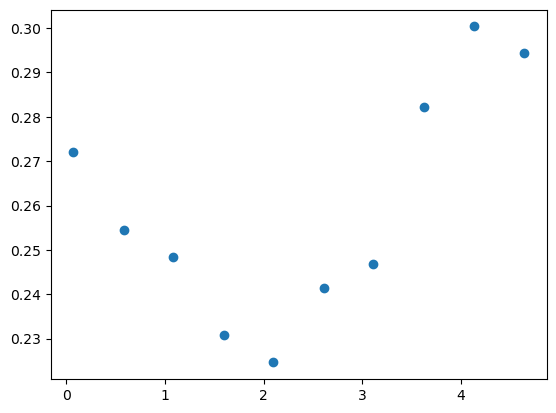

In [25]:
import matplotlib.pyplot as plt

plt.scatter(x="Years to Maturity", y="YTM", data=data)

In [26]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,Par Value,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity,Maturing Month,Zero_Yield,Years to Maturity
0,CA135087J546,CAD,2.25,4.88%,Aaa,2024-03-01,99.64,99.70,2018-10-05,99.64,1000,11.25,101.575616,11.0,0.272041,25,0.833333,3,2.757767,0.069444
1,CA135087J967,CAD,1.50,4.77%,Aaa,2024-09-01,97.98,98.06,2019-04-05,97.98,1000,7.50,99.270411,11.0,0.254576,209,6.966667,9,NaN,0.580556
2,CA135087K528,CAD,1.25,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,1000,6.25,97.745342,11.0,0.248408,390,13.000000,3,NaN,1.083333
3,CA135087K940,CAD,0.50,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,1000,2.50,94.920137,11.0,0.230807,574,19.133333,9,NaN,1.594444
4,CA135087L518,CAD,0.25,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,1000,1.25,93.235068,11.0,0.224626,755,25.166667,3,NaN,2.097222
5,CA135087L930,CAD,1.00,3.61%,Aaa,2026-09-01,93.57,93.69,2021-04-16,93.57,1000,5.00,94.430274,11.0,0.241421,939,31.300000,9,NaN,2.608333
6,CA135087M847,CAD,1.25,3.48%,Aaa,2027-03-01,93.49,93.51,2021-10-15,93.49,1000,6.25,94.565342,11.0,0.246899,1120,37.333333,3,NaN,3.111111
7,CA135087N837,CAD,2.75,3.41%,Aaa,2027-09-01,97.75,97.87,2022-05-13,97.75,1000,13.75,100.115753,11.0,0.282173,1304,43.466667,9,NaN,3.622222
8,CA135087P576,CAD,3.50,3.32%,Aaa,2028-03-01,100.65,100.72,2022-10-21,100.65,1000,17.50,103.660959,11.0,0.300348,1486,49.533333,3,NaN,4.127778
9,CA135087Q491,CAD,3.25,3.27%,Aaa,2028-09-01,99.90,99.99,2023-04-21,99.90,1000,16.25,102.695890,11.0,0.294392,1670,55.666667,9,NaN,4.638889


In [27]:
x = [0.5]
for i in range(9):
    x.append(x[-1]+0.5)

In [28]:
data["Speard"] = x

In [29]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,...,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity,Maturing Month,Zero_Yield,Years to Maturity,Speard
0,CA135087J546,CAD,2.25,4.88%,Aaa,2024-03-01,99.64,99.70,2018-10-05,99.64,...,11.25,101.575616,11.0,0.272041,25,0.833333,3,2.757767,0.069444,0.5
1,CA135087J967,CAD,1.50,4.77%,Aaa,2024-09-01,97.98,98.06,2019-04-05,97.98,...,7.50,99.270411,11.0,0.254576,209,6.966667,9,NaN,0.580556,1.0
2,CA135087K528,CAD,1.25,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,...,6.25,97.745342,11.0,0.248408,390,13.000000,3,NaN,1.083333,1.5
3,CA135087K940,CAD,0.50,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,...,2.50,94.920137,11.0,0.230807,574,19.133333,9,NaN,1.594444,2.0
4,CA135087L518,CAD,0.25,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,...,1.25,93.235068,11.0,0.224626,755,25.166667,3,NaN,2.097222,2.5
5,CA135087L930,CAD,1.00,3.61%,Aaa,2026-09-01,93.57,93.69,2021-04-16,93.57,...,5.00,94.430274,11.0,0.241421,939,31.300000,9,NaN,2.608333,3.0
6,CA135087M847,CAD,1.25,3.48%,Aaa,2027-03-01,93.49,93.51,2021-10-15,93.49,...,6.25,94.565342,11.0,0.246899,1120,37.333333,3,NaN,3.111111,3.5
7,CA135087N837,CAD,2.75,3.41%,Aaa,2027-09-01,97.75,97.87,2022-05-13,97.75,...,13.75,100.115753,11.0,0.282173,1304,43.466667,9,NaN,3.622222,4.0
8,CA135087P576,CAD,3.50,3.32%,Aaa,2028-03-01,100.65,100.72,2022-10-21,100.65,...,17.50,103.660959,11.0,0.300348,1486,49.533333,3,NaN,4.127778,4.5
9,CA135087Q491,CAD,3.25,3.27%,Aaa,2028-09-01,99.90,99.99,2023-04-21,99.90,...,16.25,102.695890,11.0,0.294392,1670,55.666667,9,NaN,4.638889,5.0


In [30]:
spread = x
relevant_data = data[["Years to Maturity", "Coupon Payment", "Dirty Price", "Par Value"]]

In [31]:
relevant_data["Payments"] = relevant_data["Years to Maturity"].apply(get_payments)

C:\Users\pinak\AppData\Local\Temp\ipykernel_2744\1875742168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data["Payments"] = relevant_data["Years to Maturity"].apply(get_payments)


In [32]:
relevant_data

,Years to Maturity,Coupon Payment,Dirty Price,Par Value,Payments
0,0.069444,11.25,101.575616,1000,{0.07}
1,0.580556,7.50,99.270411,1000,"{0.58, 0.08}"
2,1.083333,6.25,97.745342,1000,"{0.58, 1.08, 0.08}"
3,1.594444,2.50,94.920137,1000,"{0.59, 1.59, 0.09, 1.09}"
4,2.097222,1.25,93.235068,1000,"{0.6, 1.6, 2.1, 0.1, 1.1}"
5,2.608333,5.00,94.430274,1000,"{0.61, 1.61, 2.61, 2.11, 1.11, 0.11}"
6,3.111111,6.25,94.565342,1000,"{0.61, 1.11, 2.11, 2.61, 3.11, 1.61, 0.11}"
7,3.622222,13.75,100.115753,1000,"{0.62, 1.62, 2.62, 3.12, 3.62, 2.12, 1.12, 0.12}"
8,4.127778,17.50,103.660959,1000,"{0.63, 1.63, 2.63, 3.13, 3.63, 4.13, 2.13, 1.1..."
9,4.638889,16.25,102.695890,1000,"{0.64, 1.64, 2.64, 3.14, 3.64, 4.64, 4.14, 2.1..."


In [33]:
rates = {0:0}
for idx in relevant_data.index:
    _payments = sorted(relevant_data["Payments"][idx])
    _coupon = relevant_data["Coupon Payment"][idx]
    _face = relevant_data["Par Value"][idx] + _coupon
    _price = relevant_data["Dirty Price"][idx]
    
    if len(_payments) == 1:
        # zero coupon bond
        rates[_payments[0]] = np.log(_face/_price)/_payments[0]
    else:
        # non zero coupon bonds
        for _time in _payments:
            # check if the yield is calculated or not for that time
            if _time != relevant_data["Years to Maturity"][idx]:
                # we are not at the bond maturity
                if _time in rates.keys():
                    _price -= _coupon*np.exp(-rates[_time]*_time)
                else:
                    # interpolate the value and add to the rates
                    rates[_time] = get_interpolation(rates, _time)
                    _price -= _coupon*np.exp(-rates[_time]*_time)
            else:
                # we are at bond maturity
                rates[_time] = np.log(_face/_price)/_time
            

In [34]:
rates

{0: 0,
 0.07: 32.83055653881948,
 0.08: 37.52063604436512,
 0.58: 272.02461132164717,
 1.08: 506.52858659892934,
 0.09: 42.21071554991076,
 0.59: 276.71469082719284,
 1.09: 511.218666104475,
 1.59: 745.7226413817571,
 0.1: 46.90079505545634,
 0.6: 281.4047703327385,
 1.1: 515.9087456100207,
 1.6: 750.4127208873028,
 2.1: 984.916696164585,
 0.11: 51.59087456100207,
 0.61: 286.09484983828406,
 1.11: 520.5988251155663,
 1.61: 755.1028003928485,
 2.11: 989.6067756701306,
 2.61: 1224.1107509474127,
 3.11: 1458.614726224695,
 0.12: 56.280954066547686,
 0.62: 290.7849293438298,
 1.12: 525.288904621112,
 1.62: 759.792879898394,
 2.12: 994.2968551756762,
 2.62: 1228.8008304529585,
 3.12: 1463.3048057302408,
 3.62: 1697.808781007523,
 0.13: 60.97103357209332,
 0.63: 295.4750088493754,
 1.13: 529.9789841266575,
 1.63: 764.4829594039395,
 2.13: 998.9869346812218,
 2.63: 1233.4909099585038,
 3.13: 1467.994885235786,
 3.63: 1702.498860513068,
 4.13: 1937.00283579035,
 0.14: 65.66111307763907,
 0.64:

In [35]:
years = sorted(rates)
yields = [rates[i]/100 for i in years]

<Axes: >

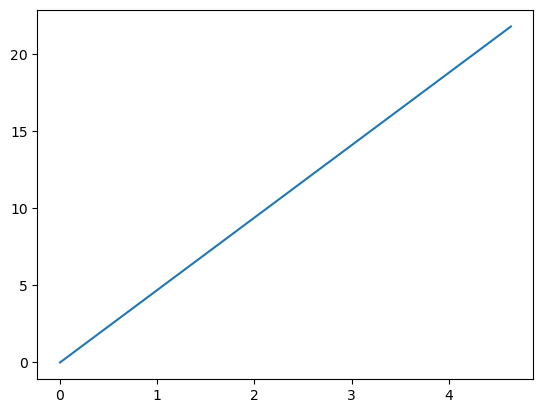

In [36]:
sns.lineplot(x=years, y=yields)